# Dev Plots

This notebook is to develop plots that will be used for anomoly and outlier detection.

Created by: TW \
Created on: 2025-03-13 \
Environment: python_20240807

## Library

In [1]:
# data processing and modeling libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import plotly
import seaborn as sns


# other libraries
import csv
from datetime import datetime
import os
import re
import shutil

## Code

Dataframes containing data to plot

In [23]:
df_iqr_results = pd.read_csv('../dev_data/iqr_results.csv', index_col=0 )
df_iqr_results.index = pd.to_datetime(df_iqr_results.index)

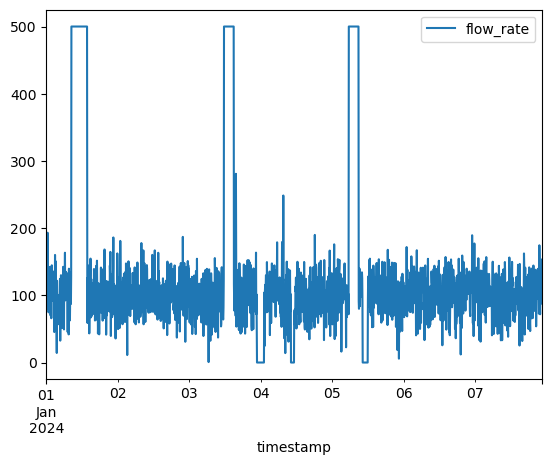

In [24]:
df_iqr_results.plot(use_index=1, y="flow_rate");

#### Line plot that highlights the outliers

In [25]:
def plot_times_series_with_outliers(df: pd.DataFrame, data_label: str = "Data", plot_title: str = "Times Series with Outliers"):
    """
    This function takes in a Pandas dataframe and returns a line plot with the outliers highlighted as red points.

    Args:
        df (pd.DataFrame): DataFrame with timestamp index, data in the first column, and the second column contains a boolean (1 = outliers and 0 = not outlier).

        data_label (str, optional): The label for the y-axis on the time series line plot.  Defaults to "Data".

        plot_title (str, optional): The title for the plot.  Defaults to "Time Series with Outliers".
    """
    # Validate data types
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DatetimeIndex")

    data_label = str(data_label)
    plot_title = str(plot_title)

    # Create Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the full time series in blue
    ax.plot(df.index, df.iloc[:,0], color='blue', linewidth=1.5, label= data_label)

    # Plot the outliers in red
    outliers = df[df.iloc[:,1] == True]
    if not outliers.empty:
        ax.scatter(outliers.index, outliers.iloc[:,0], color='red', s=10,
                  label='Outliers', zorder=5)


    ax.set_title(plot_title, fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel(data_label, fontsize=12)

    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    plt.tight_layout()

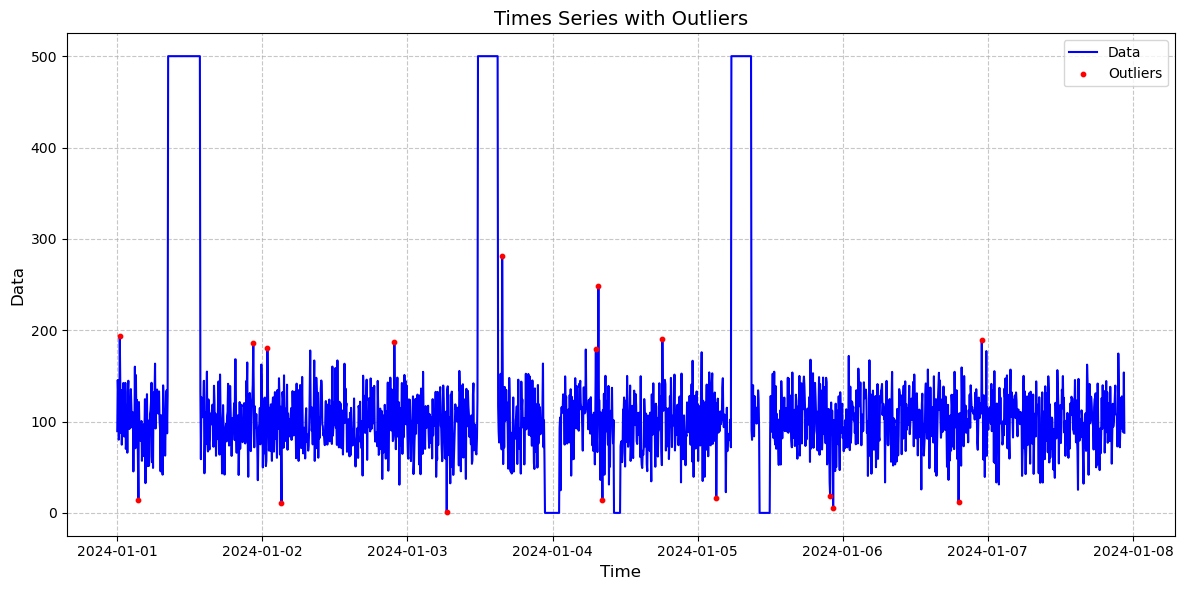

In [26]:
plot_times_series_with_outliers(df=df_iqr_results)